In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('diabetes_data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.duplicated().sum()

0

<AxesSubplot: >

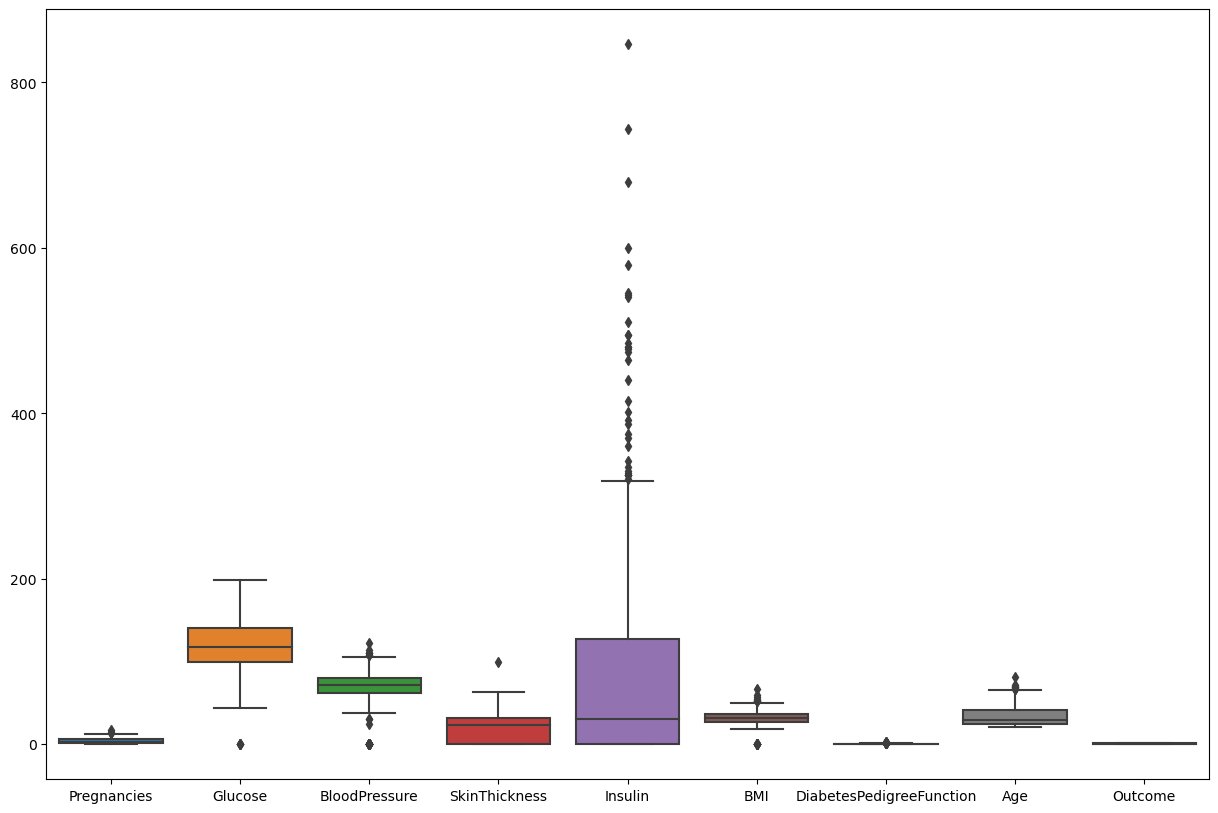

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

In [3]:
df.shape

(768, 9)

In [5]:
# indep and dep variable alada korbo 
# train test split korbo 
# hyperparamter tuning 
# decisoon tree classfier 
# train teh model 
# predict the data 
# accuracy check 



In [6]:
# indep and dept featire 
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]


In [7]:
# train test split 
from sklearn.model_selection import train_test_split

x_train,x_test ,y_train,y_test = train_test_split(X,Y,test_size=0.33)

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree_clasifier = DecisionTreeClassifier()

In [12]:
parameter ={'criterion' : ["gini", "entropy", "log_loss"],
            'splitter' : ["best", "random"],
            'max_depth': [1,2,3,4]
            }

from sklearn.model_selection import GridSearchCV

# model create 
clf = GridSearchCV(tree_clasifier,param_grid=parameter,scoring='accuracy' , cv=5)

# train and validation 
clf.fit(x_train,y_train)

print(clf.best_params_)


{'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}


In [28]:
# now decison tree model 
tree_clasifier = DecisionTreeClassifier(criterion='gini',max_depth=4,splitter='random')

# traine the model 
tree_clasifier.fit(x_train,y_train)

# predict 
y_test_pred = tree_clasifier.predict(x_test)

y_test_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
# check accuracy 
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix

# accuracy 
print(accuracy_score(y_test,y_test_pred))

# confusion matrix 
print(confusion_matrix(y_test,y_test_pred))

# classification report 
print (classification_report(y_test,y_test_pred))

0.7283464566929134
[[155  17]
 [ 52  30]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       172
           1       0.64      0.37      0.47        82

    accuracy                           0.73       254
   macro avg       0.69      0.63      0.64       254
weighted avg       0.71      0.73      0.70       254



[Text(0.5267857142857143, 0.9, 'x[3] <= 30.256\ngini = 0.462\nsamples = 514\nvalue = [328, 186]'),
 Text(0.2857142857142857, 0.7, 'x[1] <= 156.954\ngini = 0.432\nsamples = 351\nvalue = [240, 111]'),
 Text(0.14285714285714285, 0.5, 'x[3] <= 9.963\ngini = 0.361\nsamples = 305\nvalue = [233, 72]'),
 Text(0.07142857142857142, 0.3, 'x[1] <= 108.198\ngini = 0.458\nsamples = 124\nvalue = [80, 44]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.32\nsamples = 50\nvalue = [40, 10]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.497\nsamples = 74\nvalue = [40, 34]'),
 Text(0.21428571428571427, 0.3, 'x[7] <= 28.545\ngini = 0.262\nsamples = 181\nvalue = [153, 28]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.138\nsamples = 121\nvalue = [112, 9]'),
 Text(0.25, 0.1, 'gini = 0.433\nsamples = 60\nvalue = [41, 19]'),
 Text(0.42857142857142855, 0.5, 'x[7] <= 51.911\ngini = 0.258\nsamples = 46\nvalue = [7, 39]'),
 Text(0.35714285714285715, 0.3, 'x[4] <= 317.299\ngini = 0.202\nsamples = 35\nvalue = [4, 31]'),
 Te

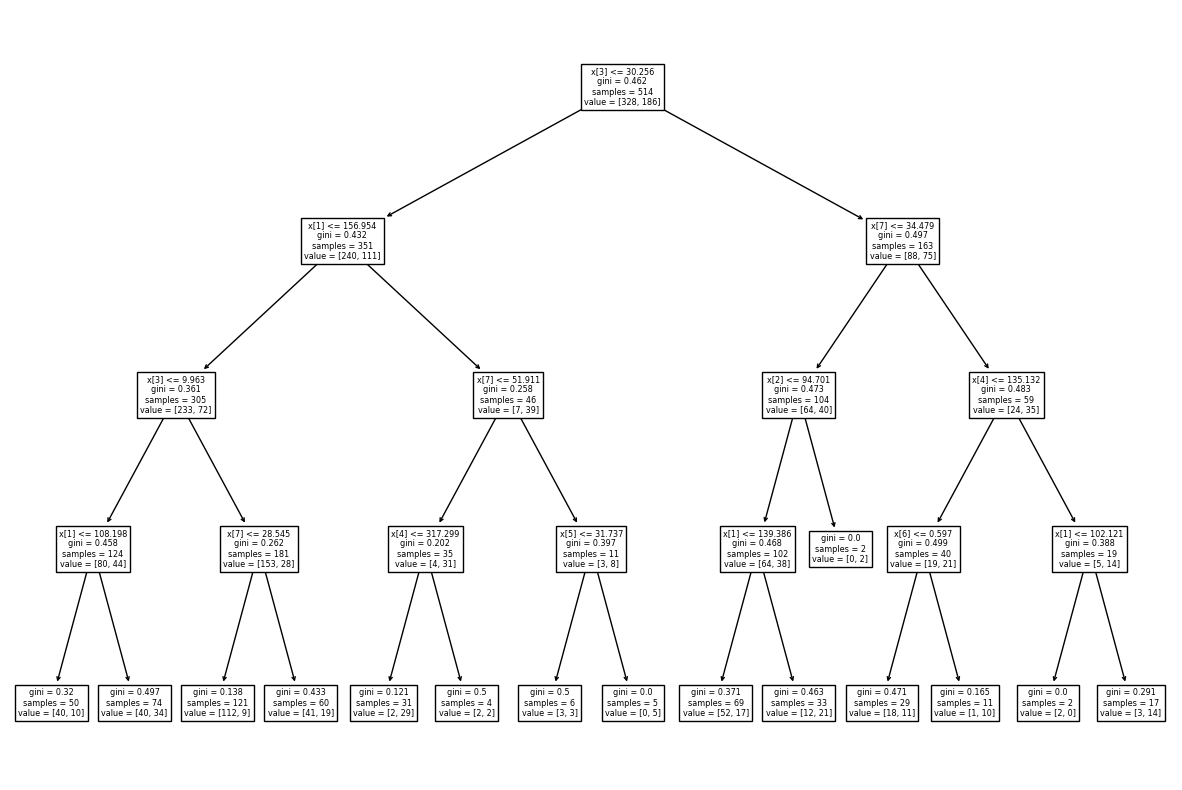

In [31]:
# plot the tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_clasifier)